NPM: 6181801030 

Nama: Clement Rivandi

NPM: 6181801032

Nama: Ivan Limosi

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data pada file diamonds.csv dan menyimpannya di variabel data
data = pd.read_csv('diamonds.csv')

Pada tugas ini, eksplorasi akan dilakukan dengan menggunakan dua macam atribut yaitu atribut numerik dan atribut kategorik. Karena tugas dibuat untuk menentukan harga sebuah berlian, maka atribut price akan dibandingkan dengan atribut-atribut lainnya.

Atribut numerik yang digunakan :
- carat
- x
- y
- z
- depth
- table

Atribut kategorik yang digunakan :
- cut
- color
- clarity

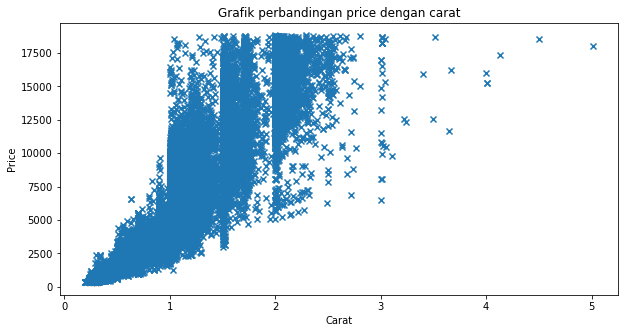

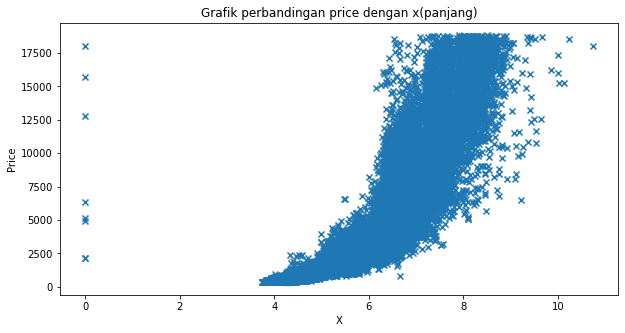

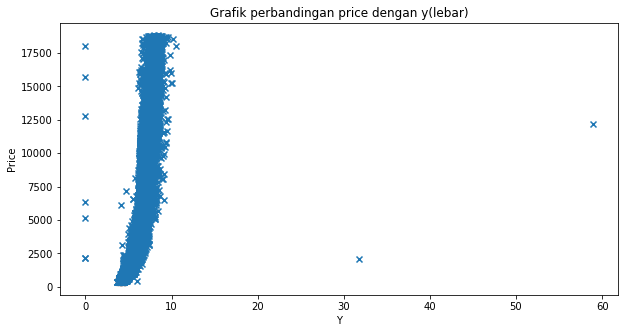

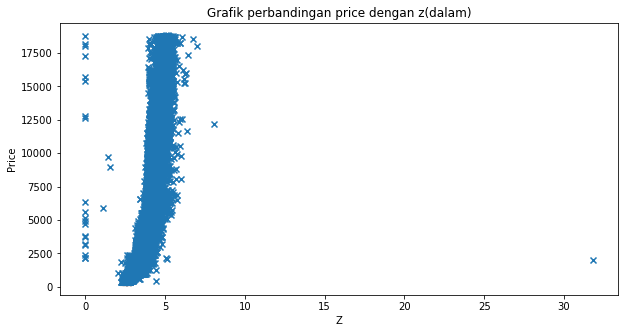

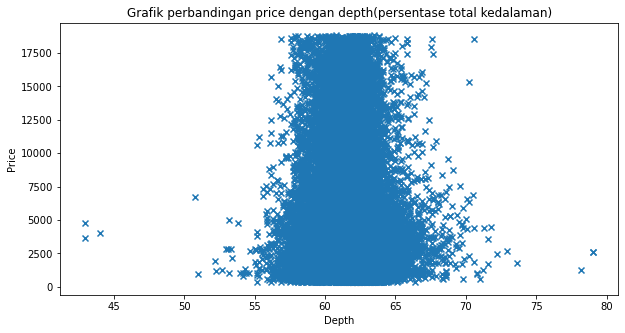

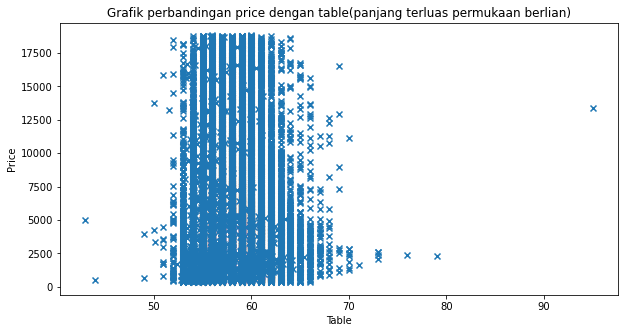

In [22]:
### Eksplorasi dengan atribut numerik ### 

# Eksplorasi pertama dilakukan dengan membandingkan atribut price dengan beberapa atribut numerik. 
# Perbandingan dibuat dengan menggunakan scatter plot agar hubungan antar atribut lebih terlihat.

# Membuat grafik untuk melihat hubungan antara atribut Price dengan Carat. 
PriceToCarat = data[['carat','price']].sort_values('carat')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(PriceToCarat['carat'], PriceToCarat['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan X(panjang)
PriceToX = data[['x','price']].sort_values('x')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan x(panjang)')
plt.xlabel('X')
plt.ylabel('Price')
plt.scatter(PriceToX['x'], PriceToX['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan Y(lebar)
PriceToY = data[['y','price']].sort_values('y')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan y(lebar)')
plt.xlabel('Y')
plt.ylabel('Price')
plt.scatter(PriceToY['y'], PriceToY['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan Z(dalam)
PriceToZ = data[['z','price']].sort_values('z')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan z(dalam)')
plt.xlabel('Z')
plt.ylabel('Price')
plt.scatter(PriceToZ['z'], PriceToZ['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan depth(persentase total kedalaman)
PriceToDepth = data[['depth','price']].sort_values('depth')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan depth(persentase total kedalaman)')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.scatter(PriceToDepth['depth'], PriceToDepth['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan table(panjang terluas permukaan berlian)
PriceToTable = data[['table','price']].sort_values('table')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan table(panjang terluas permukaan berlian)')
plt.xlabel('Table')
plt.ylabel('Price')
plt.scatter(PriceToTable['table'], PriceToTable['price'], marker='x')
plt.show()


Dari hasil pembuatan grafik scatter plot diatas, dapat dilihat bahwa atribut Price memiliki hubungan dengan atribut Carat, X, Y, dan Z. Berdasarkan grafik, atribut Price memiliki hubungan yang kuat dengan atribut Carat dan X namun memiliki hubungan yang lemah dengan atribut Y dan Z.

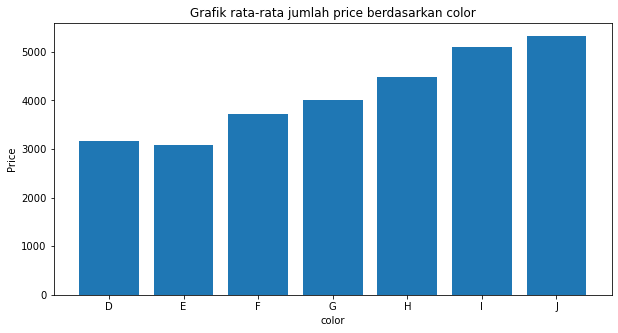

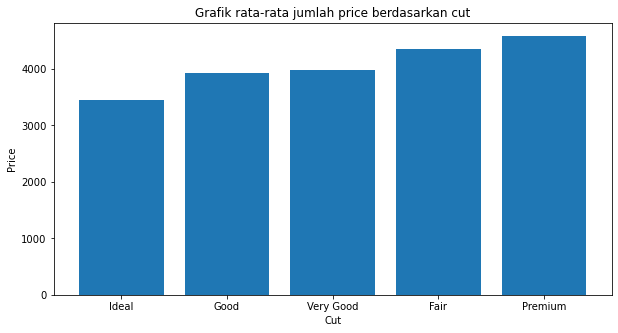

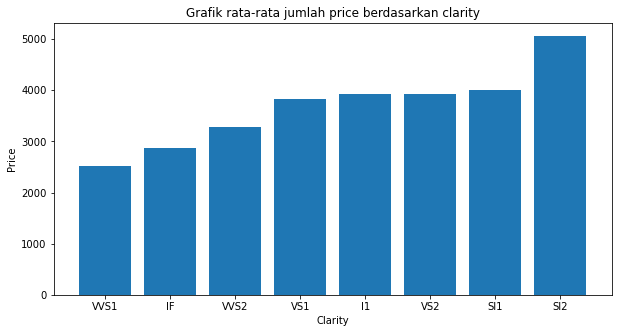

In [20]:
### Eksplorasi Data 2 ### 

#Eksplorasi kedua dilakukan dengan membandingkan atribut price dengan beberapa atribut bertipe kategorik

# Membuat grafik untuk melihat hubungan antara atribut Color dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Color.
ColorToPrice = data.groupby('color').mean().sort_values('color')
plt.figure(figsize=[10,5])
plt.title('Grafik rata-rata jumlah price berdasarkan color')
plt.xlabel('color')
plt.ylabel('Price')
plt.bar(ColorToPrice.index, ColorToPrice['price'])
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Cut dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Cut.
CutToPrice = data.groupby('cut').mean().sort_values('price')
plt.figure(figsize=[10,5])
plt.title('Grafik rata-rata jumlah price berdasarkan cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.bar(CutToPrice.index, CutToPrice['price'])
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Clarity dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Clarity.
ClarityToPrice = data.groupby('clarity').mean().sort_values('price')
plt.figure(figsize=[10,5])
plt.title('Grafik rata-rata jumlah price berdasarkan clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.bar(ClarityToPrice.index, ClarityToPrice['price'])
plt.show()